In [1]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
import tensorflow.keras as keras

# DATA SOURCE --------------------------------------------------

batch_size = 30

train_data_dir = './data/cards/train/'

validation_data_dir = './data/cards/valid/'

train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(1e-3),  # Changed optimizer to Adam
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 20


es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose=1, patience=5, restore_best_weights=True)

# Use the train_generator for training
history = model.fit(
    train_generator, 
    epochs=epochs, 
    steps_per_epoch=train_generator.samples // batch_size, 
    validation_data= validation_generator,
    callbacks = [es]
    )

Found 7509 images belonging to 4 classes.
Found 260 images belonging to 4 classes.
Epoch 1/20
250/250 [==============================] - 38s 146ms/step - loss: 1.1041 - accuracy: 0.5799 - val_loss: 0.4912 - val_accuracy: 0.7846
Epoch 2/20
250/250 [==============================] - 41s 162ms/step - loss: 0.4977 - accuracy: 0.8049 - val_loss: 0.3548 - val_accuracy: 0.8769
Epoch 3/20
250/250 [==============================] - 46s 183ms/step - loss: 0.2555 - accuracy: 0.9114 - val_loss: 0.2125 - val_accuracy: 0.9346
Epoch 4/20
250/250 [==============================] - 53s 210ms/step - loss: 0.1648 - accuracy: 0.9523 - val_loss: 0.2449 - val_accuracy: 0.9269
Epoch 5/20
250/250 [==============================] - 61s 243ms/step - loss: 0.0936 - accuracy: 0.9727 - val_loss: 0.2502 - val_accuracy: 0.9231
Epoch 6/20
250/250 [==============================] - 79s 314ms/step - loss: 0.0715 - accuracy: 0.9795 - val_loss: 0.5305 - val_accuracy: 0.9192
Epoch 7/20
250/250 [===========================

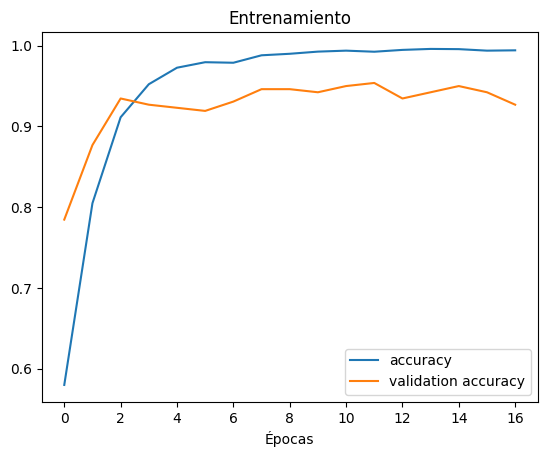

In [5]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.title('Entrenamiento')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()

Found 260 files belonging to 4 classes.
1/1 [==============================] - 0s 36ms/step
              precision    recall  f1-score   support

           0     0.9231    0.9375    0.9302        64
           1     0.9077    0.9516    0.9291        62
           2     0.9538    0.9841    0.9688        63
           3     0.9846    0.9014    0.9412        71

    accuracy                         0.9423       260
   macro avg     0.9423    0.9437    0.9423       260
weighted avg     0.9437    0.9423    0.9423       260



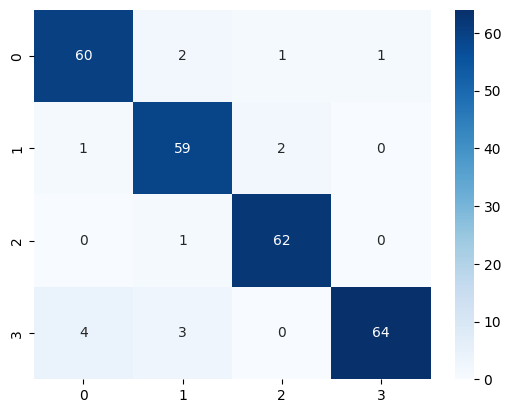

In [12]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

valid_dataset = keras.preprocessing.image_dataset_from_directory(
    directory='./data/cards/valid/',
    image_size=(224, 224),
    batch_size=batch_size,
    label_mode='categorical'
)

results = np.concatenate([(y, model.predict(x=x)) for x, y in valid_dataset], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))